<a href="https://colab.research.google.com/github/omarlura/talentotech/blob/main/Taller_iniciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Especifica la ruta de tu archivo .xlsm
file_path = '/content/example_ventas.xlsx'

# Lee el archivo .xlsm y asigna los datos a un DataFrame
df_ventas = pd.read_excel(file_path, sheet_name='Hoja 2', engine='openpyxl')

# Muestra las primeras filas del DataFrame para verificar que se ha cargado correctamente
df_ventas.head(None)


In [20]:
df_ventas.describe()

,Fecha,Ventas
count,18,18.000000
mean,2024-02-08 12:00:00,13307.388889
min,2024-01-31 00:00:00,4744.000000
25%,2024-02-04 06:00:00,8410.250000
50%,2024-02-08 12:00:00,10529.500000
75%,2024-02-12 18:00:00,13491.750000
max,2024-02-17 00:00:00,32855.000000
std,NaN,8153.055776


In [23]:
df_ventas.info('Region')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     18 non-null     datetime64[ns]
 1   Region    18 non-null     object        
 2   Producto  18 non-null     object        
 3   Vendedor  18 non-null     object        
 4   Ventas    18 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 848.0+ bytes


In [25]:
#Ejercicion 02
#Agrupamos las ventas por región
Ventas_Region = df_ventas.groupby('Region')['Ventas'].sum()
print(Ventas_Region)

Region
Central    90295
Este       63555
Oeste      85683
Name: Ventas, dtype: int64


In [66]:
#Ejercicio 03
#Filtramos las ventas a nombre de David

ventas_david = df_ventas[df_ventas['Vendedor'] == 'David']
# Agrupar las ventas de David y calcular el total
total_ventas_david = ventas_david.groupby('Vendedor')['Ventas'].sum()
# Imprimir el resultado
total_ventas_david

,Ventas
Vendedor,
David,39805


In [59]:
#Aqui generamos una conversion de EUR a COP basado en el valor de la variable euro
euro = 4600
df['Ventas_COP'] = df['Ventas'] * euro
df.head(None)

,Fecha,Region,Producto,Vendedor,Ventas,Ventas_COP
0,2024-01-31,Central,Accesorios,David,8287,38120200
1,2024-02-01,Central,Accesorios,Karen,6909,31781400
2,2024-02-02,Central,Dispositivos,David,11420,52532000
3,2024-02-03,Central,Dispositivos,Karen,12948,59560800
4,2024-02-04,Central,Sistemas,David,20098,92450800
5,2024-02-05,Central,Sistemas,Karen,30633,140911800
6,2024-02-06,Este,Accesorios,Ana,9323,42885800
7,2024-02-07,Este,Accesorios,Lucas,7667,35268200
8,2024-02-08,Este,Dispositivos,Ana,10348,47600800
9,2024-02-09,Este,Dispositivos,Lucas,9312,42835200


In [60]:
#Aqui asignamos formato $ a la columa Ventas_COP a traves de la función lambda.
#La función apply(lambda x: f'${x:,.2f}') se utiliza en pandas para formatear los elementos de una columna de un DataFrame. Vamos a descomponer esta expresión para entender mejor cada parte:

#Descomposición de la función
#apply():

#Es un método de pandas que se utiliza para aplicar una función a lo largo de un eje (filas o columnas) de un DataFrame o una Serie. En este caso, se está aplicando a una columna específica (que podría ser una Serie).
#Sintaxis: DataFrame.apply(func, axis=0), donde func es la función que se va a aplicar y axis determina si se aplica a filas (axis=0) o columnas (axis=1).
#lambda x::

#Aquí se define una función anónima (o lambda) que toma un argumento x. Esta función se aplica a cada elemento de la columna.
#lambda permite crear funciones pequeñas y rápidas sin necesidad de definirlas completamente con def.
#f'${x:,.2f}':

#Este es un string formatado (f-string) que permite insertar valores dentro de cadenas de texto de forma sencilla y legible.
#El contenido de la cadena se explica a continuación:
#$: Este es el símbolo que se añadirá al principio de la cadena, indicando que el valor es una cantidad en dólares.
#{x:,.2f}: Esto es un placeholder para el valor de x, que es el elemento actual de la columna que se está procesando.
#,: Esto especifica que se debe usar una coma como separador de miles. Por ejemplo, 1000 se convertirá en 1,000.
#.2f: Esto indica que el número debe ser formateado como un número de punto flotante con dos decimales. Por ejemplo, 1234.5 se convertirá en 1,234.50.

df['Ventas_COP'] = df['Ventas_COP'].apply(lambda x: f'${x:,.2f}')
df

,Fecha,Region,Producto,Vendedor,Ventas,Ventas_COP
0,2024-01-31,Central,Accesorios,David,8287,"$38,120,200.00"
1,2024-02-01,Central,Accesorios,Karen,6909,"$31,781,400.00"
2,2024-02-02,Central,Dispositivos,David,11420,"$52,532,000.00"
3,2024-02-03,Central,Dispositivos,Karen,12948,"$59,560,800.00"
4,2024-02-04,Central,Sistemas,David,20098,"$92,450,800.00"
5,2024-02-05,Central,Sistemas,Karen,30633,"$140,911,800.00"
6,2024-02-06,Este,Accesorios,Ana,9323,"$42,885,800.00"
7,2024-02-07,Este,Accesorios,Lucas,7667,"$35,268,200.00"
8,2024-02-08,Este,Dispositivos,Ana,10348,"$47,600,800.00"
9,2024-02-09,Este,Dispositivos,Lucas,9312,"$42,835,200.00"


In [55]:
#Aqui asignamos formato € a la columa Ventas a traves de la función lambda.

df['Ventas'] = df['Ventas'].apply(lambda x: f'€{x:,.2f}')
df

,Fecha,Region,Producto,Vendedor,Ventas,Ventas_COP
0,2024-01-31,Central,Accesorios,David,"€8,287.00","$38,120,200.00"
1,2024-02-01,Central,Accesorios,Karen,"€6,909.00","$31,781,400.00"
2,2024-02-02,Central,Dispositivos,David,"€11,420.00","$52,532,000.00"
3,2024-02-03,Central,Dispositivos,Karen,"€12,948.00","$59,560,800.00"
4,2024-02-04,Central,Sistemas,David,"€20,098.00","$92,450,800.00"
5,2024-02-05,Central,Sistemas,Karen,"€30,633.00","$140,911,800.00"
6,2024-02-06,Este,Accesorios,Ana,"€9,323.00","$42,885,800.00"
7,2024-02-07,Este,Accesorios,Lucas,"€7,667.00","$35,268,200.00"
8,2024-02-08,Este,Dispositivos,Ana,"€10,348.00","$47,600,800.00"
9,2024-02-09,Este,Dispositivos,Lucas,"€9,312.00","$42,835,200.00"


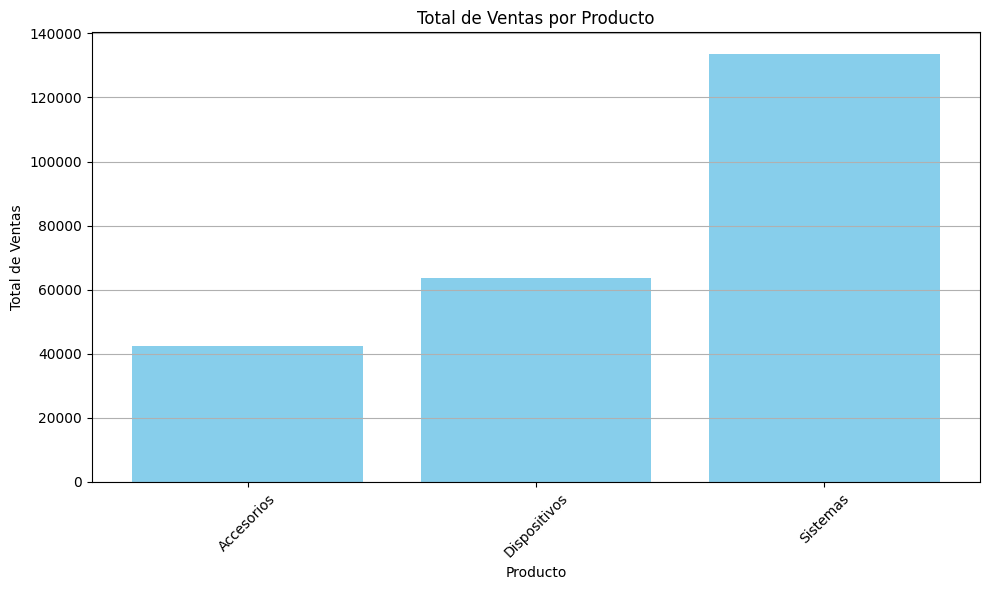

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame con los datos proporcionados
data = df_ventas


df = pd.DataFrame(data)

# Agrupar las ventas por producto
ventas_por_producto = df.groupby('Producto')['Ventas'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_producto['Producto'], ventas_por_producto['Ventas'], color='skyblue')
plt.xlabel('Producto')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Producto')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.grid(axis='y')  # Agregar líneas de cuadrícula en el eje y
plt.show()
